In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
vehicles = pd.read_csv('./data/vehicles.csv')
print(f"Total records: {len(vehicles):,}")
print(f"Price range: ${vehicles['price'].min():,.2f} to ${vehicles['price'].max():,.2f}")


Total records: 426,880
Price range: $0.00 to $3,736,928,711.00


In [3]:
# Create price distribution with 1000 bins
n_bins = 1000

# Calculate histogram
counts, bin_edges = np.histogram(vehicles['price'], bins=n_bins)

# Create a dataframe for easy viewing
price_dist = pd.DataFrame({
    'Range_Start': bin_edges[:-1],
    'Range_End': bin_edges[1:],
    'Count': counts
})

# Add percentage column
price_dist['Percentage'] = (price_dist['Count'] / len(vehicles) * 100).round(2)

# Add cumulative percentage
price_dist['Cumulative_Pct'] = price_dist['Percentage'].cumsum().round(2)

# Format for display
price_dist['Range'] = price_dist.apply(
    lambda row: f"${row['Range_Start']:,.2f} - ${row['Range_End']:,.2f}", axis=1
)

print("Price Distribution Summary (1000 bins)")
print("=" * 80)
print(f"Total bins: {n_bins}")
print(f"Non-empty bins: {(counts > 0).sum()}")
print(f"Bin width: ${(bin_edges[1] - bin_edges[0]):,.2f}")
print("\nFirst 20 ranges with vehicles:")
print(price_dist[price_dist['Count'] > 0][['Range', 'Count', 'Percentage', 'Cumulative_Pct']].head(20).to_string(index=False))


Price Distribution Summary (1000 bins)
Total bins: 1000
Non-empty bins: 17
Bin width: $3,736,928.71

First 20 ranges with vehicles:
                                Range  Count  Percentage  Cumulative_Pct
                $0.00 - $3,736,928.71 426848       99.99           99.99
        $3,736,928.71 - $7,473,857.42      2        0.00           99.99
       $7,473,857.42 - $11,210,786.13      2        0.00           99.99
      $11,210,786.13 - $14,947,714.84      6        0.00           99.99
      $14,947,714.84 - $18,684,643.55      1        0.00           99.99
      $22,421,572.27 - $26,158,500.98      1        0.00           99.99
     $97,160,146.49 - $100,897,075.20      1        0.00           99.99
    $112,107,861.33 - $115,844,790.04      1        0.00           99.99
    $123,318,647.46 - $127,055,576.17      6        0.00           99.99
    $134,529,433.60 - $138,266,362.31      1        0.00           99.99
    $986,549,179.70 - $990,286,108.42      2        0.00         

In [4]:
# Show bins with most vehicles
print("\nTop 20 Price Ranges (by count):")
print("=" * 80)
top_ranges = price_dist.nlargest(20, 'Count')[['Range', 'Count', 'Percentage', 'Cumulative_Pct']]
print(top_ranges.to_string(index=False))



Top 20 Price Ranges (by count):
                                Range  Count  Percentage  Cumulative_Pct
                $0.00 - $3,736,928.71 426848       99.99           99.99
      $11,210,786.13 - $14,947,714.84      6        0.00           99.99
    $123,318,647.46 - $127,055,576.17      6        0.00           99.99
        $3,736,928.71 - $7,473,857.42      2        0.00           99.99
       $7,473,857.42 - $11,210,786.13      2        0.00           99.99
    $986,549,179.70 - $990,286,108.42      2        0.00           99.99
$1,109,867,827.17 - $1,113,604,755.88      2        0.00           99.99
$3,023,175,327.20 - $3,026,912,255.91      2        0.00           99.99
$3,733,191,782.29 - $3,736,928,711.00      2        0.00           99.99
      $14,947,714.84 - $18,684,643.55      1        0.00           99.99
      $22,421,572.27 - $26,158,500.98      1        0.00           99.99
     $97,160,146.49 - $100,897,075.20      1        0.00           99.99
    $112,107,861.3

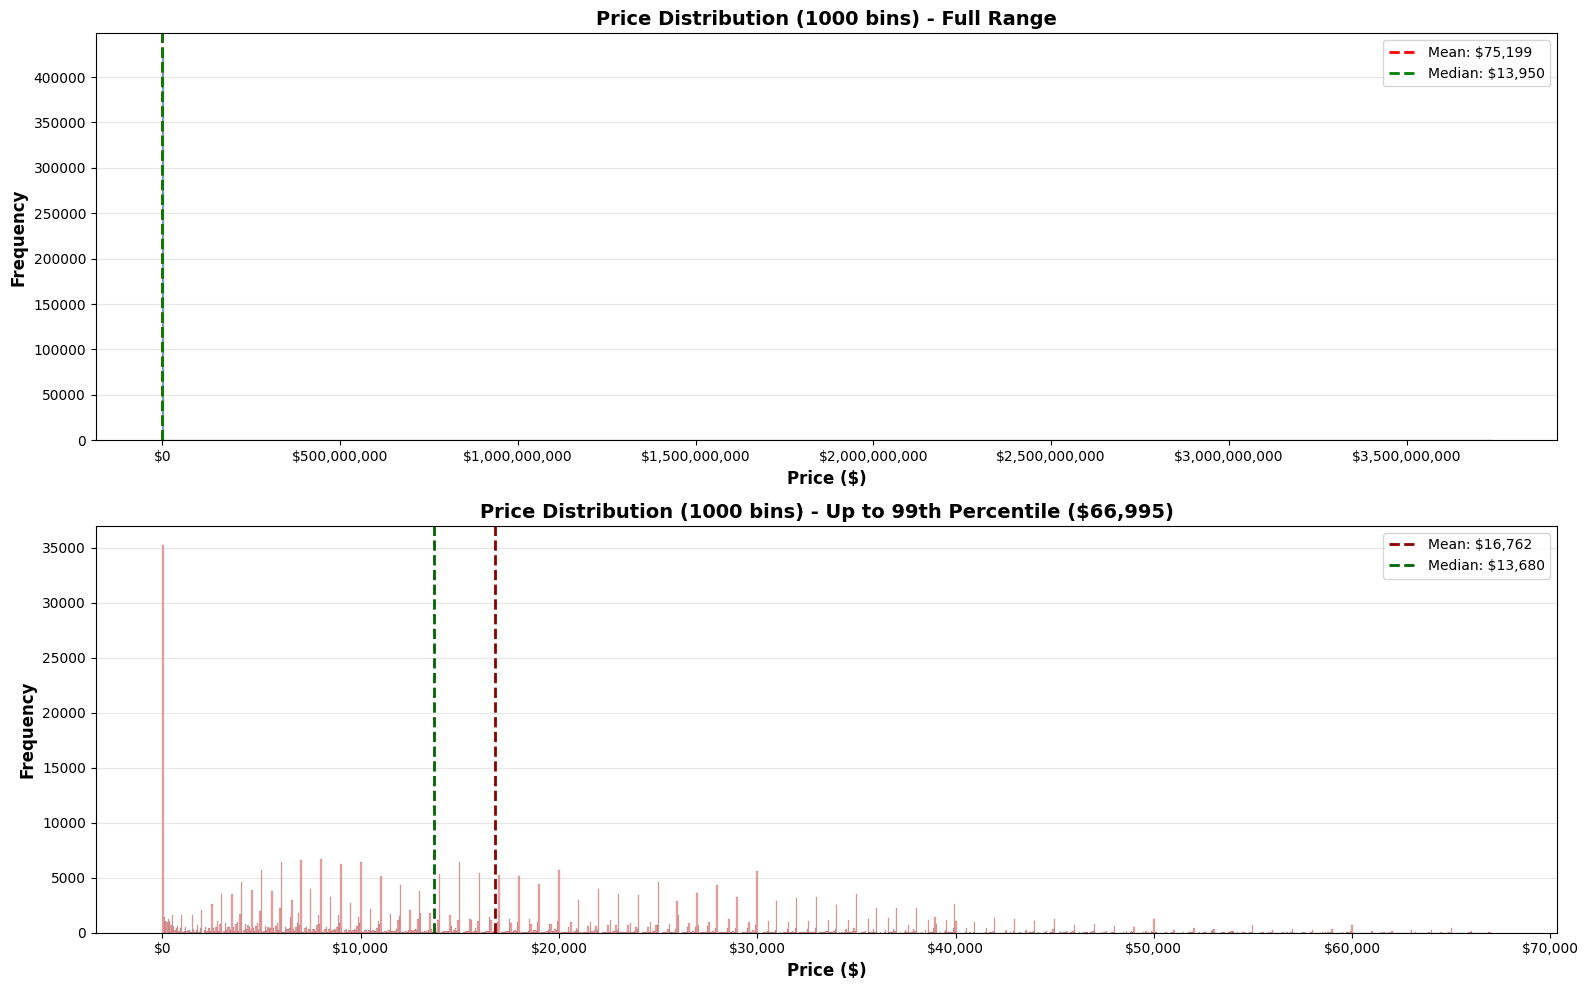

In [5]:
# Visualize the full distribution
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Full distribution with 1000 bins
ax1 = axes[0]
ax1.hist(vehicles['price'], bins=n_bins, color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.1)
ax1.set_xlabel('Price ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title(f'Price Distribution ({n_bins} bins) - Full Range', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add statistics
mean_price = vehicles['price'].mean()
median_price = vehicles['price'].median()
ax1.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
ax1.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')
ax1.legend(fontsize=10)

# Plot 2: Zoomed in (up to 99th percentile) for better detail
ax2 = axes[1]
price_99 = vehicles['price'].quantile(0.99)
price_filtered = vehicles[vehicles['price'] <= price_99]['price']

ax2.hist(price_filtered, bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black', linewidth=0.1)
ax2.set_xlabel('Price ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title(f'Price Distribution ({n_bins} bins) - Up to 99th Percentile (${price_99:,.0f})', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add statistics for filtered data
ax2.axvline(price_filtered.mean(), color='darkred', linestyle='--', linewidth=2, 
            label=f'Mean: ${price_filtered.mean():,.0f}')
ax2.axvline(price_filtered.median(), color='darkgreen', linestyle='--', linewidth=2, 
            label=f'Median: ${price_filtered.median():,.0f}')
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()


In [6]:
# Summary statistics by price bands
print("\n" + "=" * 80)
print("SUMMARY STATISTICS BY PRICE RANGE")
print("=" * 80)

# Create broader price bands for summary
price_bands = [
    (0, 5000, "Under $5k"),
    (5000, 10000, "$5k - $10k"),
    (10000, 15000, "$10k - $15k"),
    (15000, 20000, "$15k - $20k"),
    (20000, 30000, "$20k - $30k"),
    (30000, 50000, "$30k - $50k"),
    (50000, 100000, "$50k - $100k"),
    (100000, float('inf'), "Over $100k")
]

summary_data = []
for low, high, label in price_bands:
    count = ((vehicles['price'] >= low) & (vehicles['price'] < high)).sum()
    pct = count / len(vehicles) * 100
    summary_data.append({
        'Range': label,
        'Count': f"{count:,}",
        'Percentage': f"{pct:.2f}%"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))
print("\n" + "=" * 80)



SUMMARY STATISTICS BY PRICE RANGE

       Range  Count Percentage
   Under $5k 95,312     22.33%
  $5k - $10k 79,652     18.66%
 $10k - $15k 53,811     12.61%
 $15k - $20k 49,107     11.50%
 $20k - $30k 69,758     16.34%
 $30k - $50k 66,199     15.51%
$50k - $100k 12,344      2.89%
  Over $100k    697      0.16%



In [7]:
# Access the full distribution dataframe
# price_dist contains all 1000 bins with columns:
# - Range_Start: Start of price range
# - Range_End: End of price range  
# - Count: Number of vehicles in this range
# - Percentage: Percentage of total vehicles
# - Cumulative_Pct: Cumulative percentage
# - Range: Formatted string of the range

print(f"\nFull distribution dataframe 'price_dist' is available with {len(price_dist)} rows")
print(f"Shape: {price_dist.shape}")
print(f"\nColumns: {list(price_dist.columns)}")
print("\nExample: View bins 100-110")
print(price_dist.iloc[100:110][['Range', 'Count', 'Percentage']].to_string())

# You can also export to CSV for Excel/other analysis:
# price_dist.to_csv('price_distribution_1000_bins.csv', index=False)



Full distribution dataframe 'price_dist' is available with 1000 rows
Shape: (1000, 6)

Columns: ['Range_Start', 'Range_End', 'Count', 'Percentage', 'Cumulative_Pct', 'Range']

Example: View bins 100-110
                                 Range  Count  Percentage
100  $373,692,871.10 - $377,429,799.81      0         0.0
101  $377,429,799.81 - $381,166,728.52      0         0.0
102  $381,166,728.52 - $384,903,657.23      0         0.0
103  $384,903,657.23 - $388,640,585.94      0         0.0
104  $388,640,585.94 - $392,377,514.66      0         0.0
105  $392,377,514.66 - $396,114,443.37      0         0.0
106  $396,114,443.37 - $399,851,372.08      0         0.0
107  $399,851,372.08 - $403,588,300.79      0         0.0
108  $403,588,300.79 - $407,325,229.50      0         0.0
109  $407,325,229.50 - $411,062,158.21      0         0.0


In [8]:


vehicles_price = vehicles[(vehicles['price'] >= 500) & (vehicles['price'] <= 100000)]

In [9]:
vehicles_price

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [10]:
vehicles_price.describe()

,id,price,year,odometer
count,3.841310e+05,384131.000000,382959.000000,3.820160e+05
mean,7.311465e+09,19161.445457,2010.972564,9.859866e+04
std,4.477699e+06,14412.286474,9.589498,1.920286e+05
min,7.207408e+09,500.000000,1900.000000,0.000000e+00
25%,7.308081e+09,7800.000000,2008.000000,3.837900e+04
50%,7.312581e+09,15900.000000,2013.000000,8.781450e+04
75%,7.315244e+09,27990.000000,2017.000000,1.360000e+05
max,7.317101e+09,100000.000000,2022.000000,1.000000e+07


In [ ]:

vehicles_price = vehicles.query("500 <= price <= 100000")

In [ ]:
vehicles = vehicles[(vehicles['price'] >= 500) & (vehicles['price'] <= 100000)]

In [17]:
vehicles['price_bin_5k'] = (vehicles['price'] // 5000) * 5000

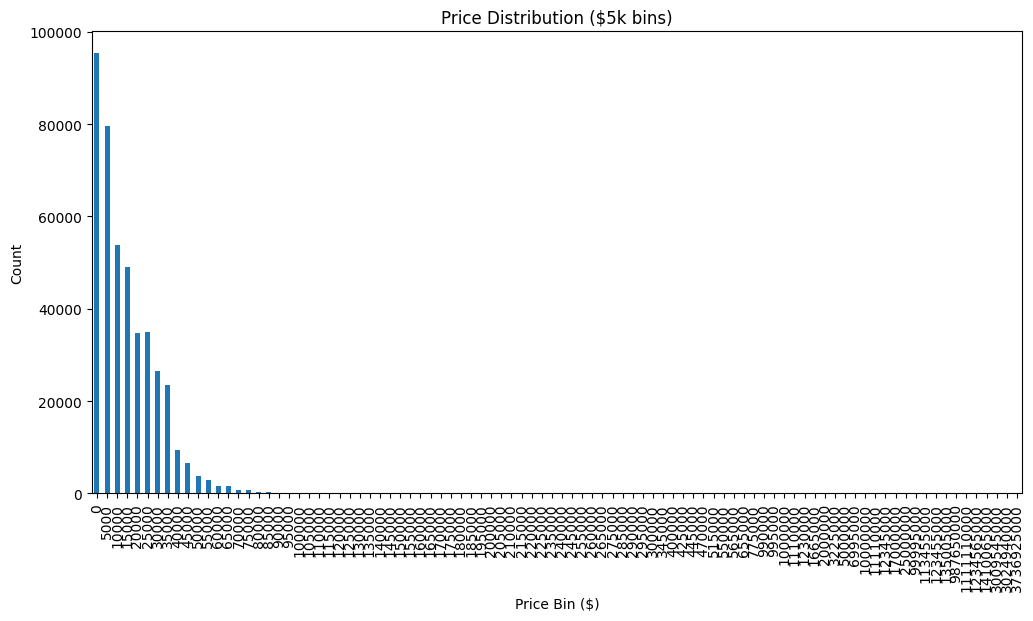

In [18]:
vehicles['price_bin_5k'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Price Distribution ($5k bins)")
plt.xlabel("Price Bin ($)")
plt.ylabel("Count")
plt.show()

In [21]:
vehicles = pd.read_csv('./data/vehicles.csv')
print(f"Total records: {len(vehicles):,}")
print(f"Price range: ${vehicles['price'].min():,.2f} to ${vehicles['price'].max():,.2f}")


Total records: 426,880
Price range: $0.00 to $3,736,928,711.00


In [22]:
vehicles = vehicles[(vehicles['price'] >= 500) & (vehicles['price'] <= 100000)]

In [23]:
bins = range(0, 105000, 5000)  # 0–100k in $5k steps

vehicles['price_bucket'] = pd.cut(
    vehicles['price'], 
    bins=bins,
    labels=[f"${b}-${b+5000}" for b in bins[:-1]],
    include_lowest=True
)

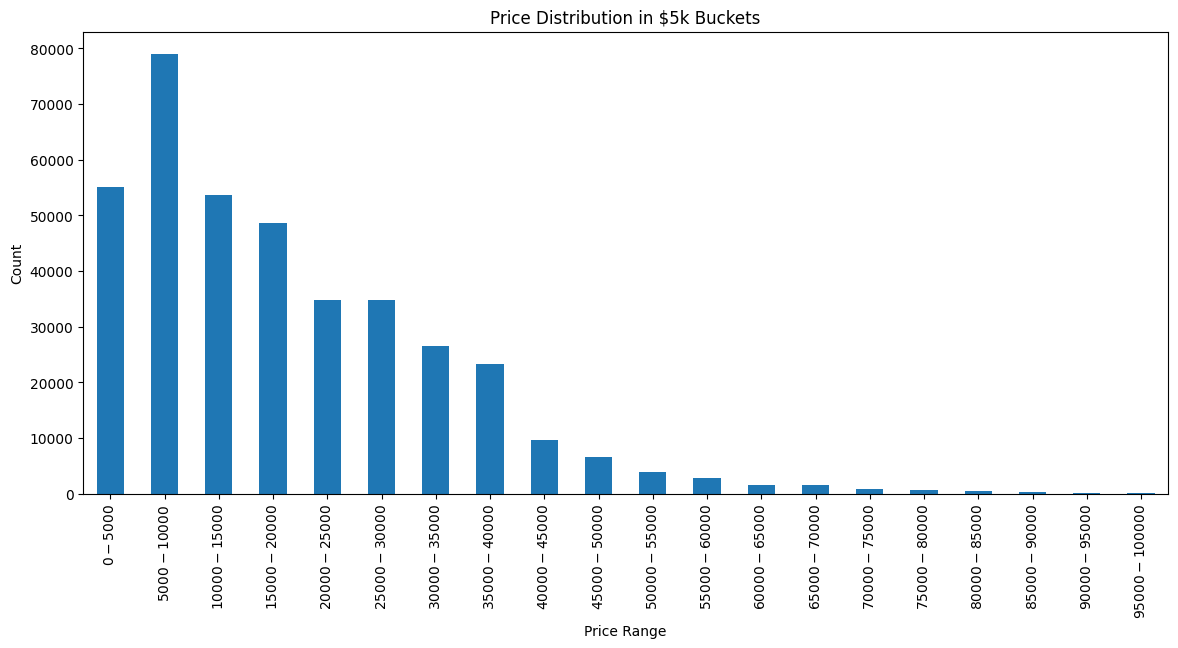

In [24]:
vehicles['price_bucket'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=90)
plt.title("Price Distribution in $5k Buckets")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()